In [1]:
import pandas as pd
import numpy as np
import pathlib as pl

from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator

from scipy.stats import mannwhitneyu, fisher_exact, pearsonr, kruskal

In [2]:
import sys
sys.path.append("../../FinalCode/")
import download.download as dwnl
import utils.plotting as plting

In [3]:
# For figures
colors = sns.color_palette("muted")
palette = {"Normal": colors[0], "NADJ-A": colors[3], "NADJ-C": colors[2], "Adenoma": colors[3], "SSL": colors[4], "Cancer": colors[5]}
fig_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/ArticleFigures/unit")

In [4]:
def print_characteristic(EPIC_clin: pd.DataFrame, 
                         EPIC_phenotypes: np.ndarray, 
                         charac: str, count: bool) -> None:
    print("Total")
    if count:
        print(EPIC_clin[charac].sum(), EPIC_clin[charac].sum()/EPIC_clin.shape[0])
    else:
        print(EPIC_clin[charac].describe())
    print("Healthy")
    healthy = EPIC_clin.iloc[EPIC_phenotypes==0][charac]
    if count:
        print(healthy.sum(), healthy.sum()/healthy.shape[0])
    else:
        print(healthy.describe())
    print("Adenoma pat")
    adenoma = EPIC_clin.iloc[EPIC_phenotypes==1][charac]
    if count:
        print(adenoma.sum(), adenoma.sum()/adenoma.shape[0])
    else:
        print(adenoma.describe())
    print("pval healthy vs adenoma")
    if count:
        a = adenoma.sum()
        b = healthy.sum()
        c = adenoma.shape[0] - a
        d = healthy.shape[0] - b
        print(fisher_exact(np.array([[a,b],[c,d]])))
    else:
        print(mannwhitneyu(healthy.dropna().ravel(),adenoma.dropna().ravel()))

In [5]:
base_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/sesame_processed_EPIC/")
base_dir4 = pl.Path("/Users/josephineyates/Documents/CRC_polyp/sesame_processed_EPIC4/")

data_dir = pl.Path("/Users/josephineyates/Documents/CRC_polyp/FinalData/")

bad_probes = pd.read_csv(data_dir / "auxiliary" / "sketchy_probe_list_epic.csv",index_col=0).values.ravel()
sample_origin_path = pl.Path(data_dir / "clinical" / "sample_origin_wbatch.csv")

clinical_path = pl.Path(data_dir / "clinical" /"cleaned_clinical_reduced_diet.csv")
target_path = pl.Path(data_dir / "clinical" / "targets.csv")

In [6]:
EPIC2_b, EPIC2_clin, EPIC2_samples, EPIC2_phenotypes, EPIC3_b, EPIC3_clin, EPIC3_samples, EPIC3_phenotypes = dwnl.download_EPIC(sample_origin_path=sample_origin_path, 
                     base_dir=base_dir, clinical_path=clinical_path, target_path=target_path,
                  bad_probes=bad_probes, EPIC4=False) 

30it [00:03,  8.07it/s]


In [7]:
EPIC4_b, EPIC4_clin, EPIC4_samples, EPIC4_phenotypes = dwnl.download_EPIC(sample_origin_path=sample_origin_path, 
                     base_dir=base_dir4, clinical_path=clinical_path, target_path=target_path, 
                  bad_probes=bad_probes, EPIC4=True) 

18it [00:03,  5.91it/s]


In [23]:
def get_barplot_gender(df: pd.DataFrame, name: str, color) -> None:
    fig, ax = plt.subplots(1,1,figsize=(2,3))
    sns.barplot(data=df.T, color=color, ax=ax)
    plting.transform_plot_ax(ax, legend_title="")
    ax.set_ylabel("%",fontsize=15)
    ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=15)
    ax.figure.savefig(fig_dir / "clinical_barplots" / name, bbox_inches="tight") 

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose la

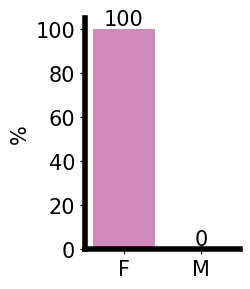

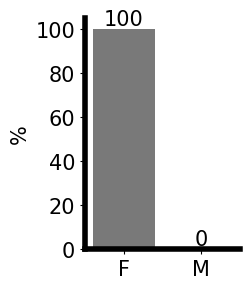

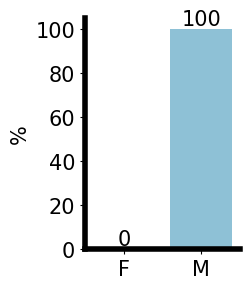

In [24]:
df = pd.DataFrame(np.array([100,0]), index=["F","M"])
get_barplot_gender(df,"SWEPIC1_gender.svg",colors[6])

df = pd.DataFrame(np.array([100,0]), index=["F","M"])
get_barplot_gender(df,"SWEPIC2_gender.svg",colors[7])

df = pd.DataFrame(np.array([0,100]), index=["F","M"])
get_barplot_gender(df,"SWEPIC3_gender.svg",colors[9])

In [19]:
def get_barplot_ad_swepic(df: pd.DataFrame, name: str) -> None:
    fig, ax = plt.subplots(1,1,figsize=(2,3))
    sns.barplot(data=df.T, palette = [colors[0], colors[3]],ax=ax)
    ax.set_ylim([0,100])
    plting.transform_plot_ax(ax, legend_title="")
    ax.get_yaxis().set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.bar_label(ax.containers[0], fmt='%.0f', fontsize=15)
    ax.figure.savefig(fig_dir / "clinical_barplots" / name, bbox_inches="tight")

/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
/Users/josephineyates/opt/anaconda3/envs/methylation/lib/python3.9/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]
No artists with labels found to put in legend.  Note that artists whose la

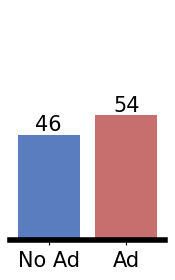

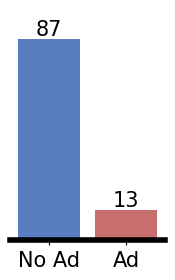

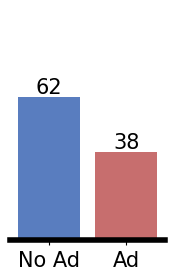

In [20]:
percpos = np.sum(EPIC2_phenotypes.astype(int))/len(EPIC2_phenotypes)
percneg = (len(EPIC2_phenotypes) - np.sum(EPIC2_phenotypes.astype(int)))/len(EPIC2_phenotypes)
df = pd.DataFrame(np.array([percneg,percpos]), index=["No Ad","Ad"])*100

get_barplot_ad_swepic(df=df, name="SWEPIC1_ad.svg")

percpos = np.sum(EPIC3_phenotypes.astype(int))/len(EPIC3_phenotypes)
percneg = (len(EPIC3_phenotypes) - np.sum(EPIC3_phenotypes.astype(int)))/len(EPIC3_phenotypes)

df = pd.DataFrame(np.array([percneg,percpos]), index=["No Ad","Ad"])*100
get_barplot_ad_swepic(df=df, name="SWEPIC2_ad.svg")

percpos = np.sum(EPIC4_phenotypes.astype(int))/len(EPIC4_phenotypes)
percneg = (len(EPIC4_phenotypes) - np.sum(EPIC4_phenotypes.astype(int)))/len(EPIC4_phenotypes)

df = pd.DataFrame(np.array([percneg,percpos]), index=["No Ad","Ad"])*100
get_barplot_ad_swepic(df=df, name="SWEPIC3_ad.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/notebooks/../../FinalCode/utils/plotting.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=ftsize)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/Users/josephineyates/Documents/CRC_polyp/FinalCode/noteboo

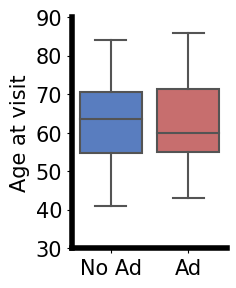

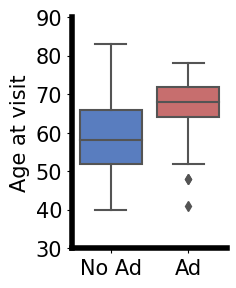

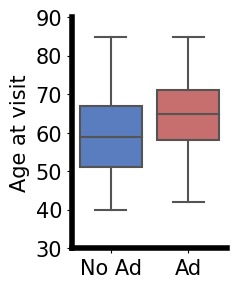

In [31]:
df = pd.concat([EPIC2_clin[["Age at visit"]],
                pd.DataFrame(EPIC2_phenotypes, index=EPIC2_clin.index, columns=["Ad"]).replace({0: "No Ad", 1: "Ad"})],axis=1)

fig, ax = plt.subplots(1,1,figsize=(2,3))
sns.boxplot(data=df,y="Age at visit",x="Ad",palette={"No Ad": colors[0], "Ad": colors[3]},ax=ax)
ax.set_ylim([30,90])
plting.transform_plot_ax(ax, legend_title="")
ax.set_xlabel("")
ax.figure.savefig(fig_dir / "clinical_barplots" / "SWEPIC1_age_ad_dist.svg",bbox_inches="tight")

df = pd.concat([EPIC3_clin[["Age at visit"]],
                pd.DataFrame(EPIC3_phenotypes, index=EPIC3_clin.index, columns=["Ad"]).replace({0: "No Ad", 1: "Ad"})],axis=1)

fig, ax = plt.subplots(1,1,figsize=(2,3))
sns.boxplot(data=df,y="Age at visit",x="Ad",palette={"No Ad": colors[0], "Ad": colors[3]},ax=ax)
ax.set_ylim([30,90])
plting.transform_plot_ax(ax, legend_title="")
ax.set_xlabel("")
ax.figure.savefig(fig_dir / "clinical_barplots" / "SWEPIC2_age_ad_dist.svg",bbox_inches="tight")

df = pd.concat([EPIC4_clin[["Age at visit"]],
                pd.DataFrame(EPIC4_phenotypes, index=EPIC4_clin.index, columns=["Ad"]).replace({0: "No Ad", 1: "Ad"})],axis=1)

fig, ax = plt.subplots(1,1,figsize=(2,3))
sns.boxplot(data=df,y="Age at visit",x="Ad",palette={"No Ad": colors[0], "Ad": colors[3]},ax=ax)
ax.set_ylim([30,90])
plting.transform_plot_ax(ax, legend_title="")
ax.set_xlabel("")
ax.figure.savefig(fig_dir / "clinical_barplots" / "SWEPIC3_age_ad_dist.svg",bbox_inches="tight")


# tSNE data

In [10]:
full_EPIC_b = pd.concat([EPIC2_b,EPIC3_b,EPIC4_b]).dropna(axis=1)

In [12]:
full_EPIC_b.shape

(1111, 282321)

In [11]:
full_EPIC_clin = pd.concat([EPIC2_clin, EPIC3_clin, EPIC4_clin])
full_EPIC_phenotypes = np.concatenate([EPIC2_phenotypes, EPIC3_phenotypes, EPIC4_phenotypes])

In [171]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(full_EPIC_b)
X_tsne = pd.DataFrame(X_tsne, index=full_EPIC_b.index, columns=["TSNE1","TSNE2"])

X_tsne = pd.concat([X_tsne, full_EPIC_clin],axis=1)

In [261]:
batch = np.concatenate([["SWEPIC1"]*EPIC2_clin.shape[0],["SWEPIC2"]*EPIC3_clin.shape[0],["SWEPIC3"]*EPIC4_clin.shape[0]])

X_tsne["Batch"] = batch

X_tsne["Adenoma"] = full_EPIC_phenotypes
X_tsne["Adenoma"] = X_tsne["Adenoma"].replace({0: "No", 1: "Yes"})

X_tsne["Gender"] = X_tsne["Gender"].replace({1: "F", 0: "M"})

X_tsne["Metabolic syndrome"] = X_tsne["Metabolic syndrome"].replace({0: "No", 1: "Yes"})

X_tsne["Analgesic >=2 years (overall)"] = X_tsne["Analgesic >=2 years (overall)"].replace({0: "No", 1: "Yes"})

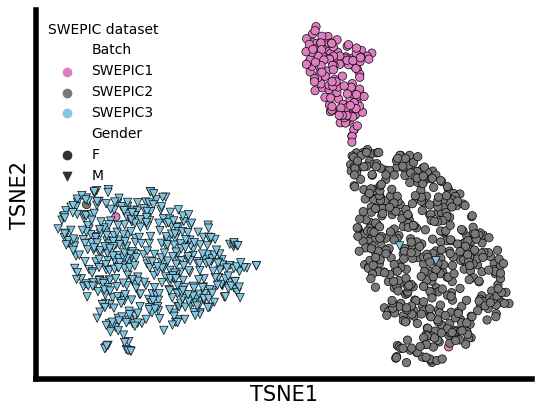

In [381]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="Batch", style="Gender", palette={"SWEPIC1": colors[6], 
                                                                           "SWEPIC2": colors[7], 
                                                                           "SWEPIC3": colors[9]}, 
                     markers={"F": "o", "M": "v"}, edgecolor="black")
plting.tsne_plot_ax(ax=ax, legend_title="SWEPIC dataset", leg_ftsize=10, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_batch.png", dpi=250, bbox_inches="tight")

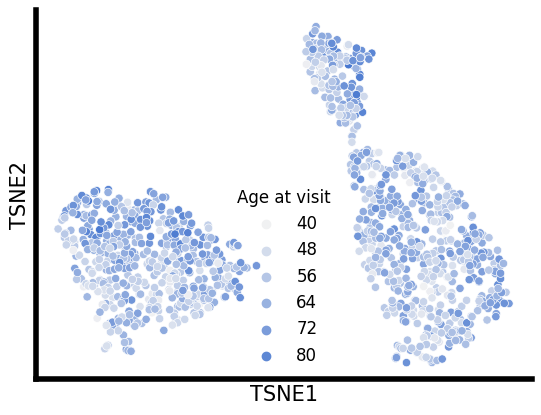

In [367]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="Age at visit", palette=sns.light_palette(colors[0], as_cmap=True))
plting.tsne_plot_ax(ax=ax, legend_title="Age at visit", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_age.png", dpi=250, bbox_inches="tight")

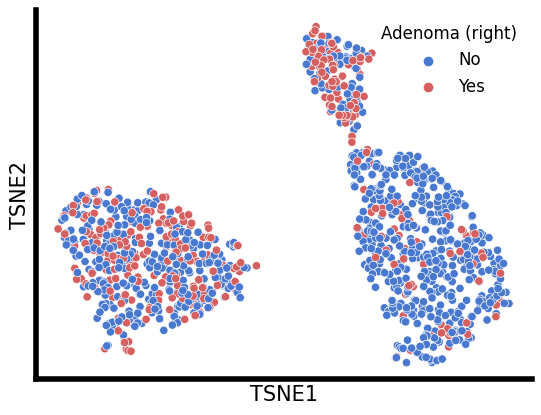

In [366]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="Adenoma", palette = {"Yes": colors[3], "No": colors[0]})
plting.tsne_plot_ax(ax=ax, legend_title="Adenoma (right)", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_adenoma.png", dpi=250, bbox_inches="tight")

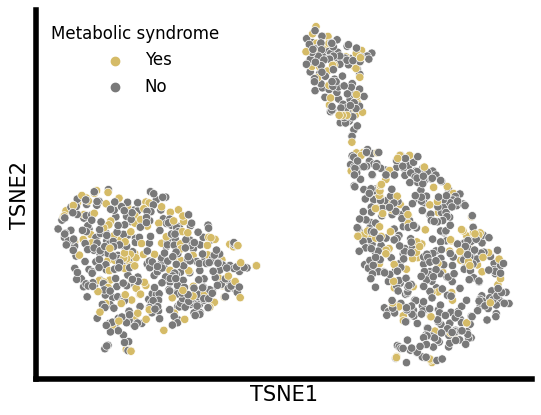

In [365]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="Metabolic syndrome", palette={"No": colors[7], "Yes": colors[8]})
plting.tsne_plot_ax(ax=ax, legend_title="Metabolic syndrome", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_Metabolic syndrome.png", dpi=250, bbox_inches="tight")

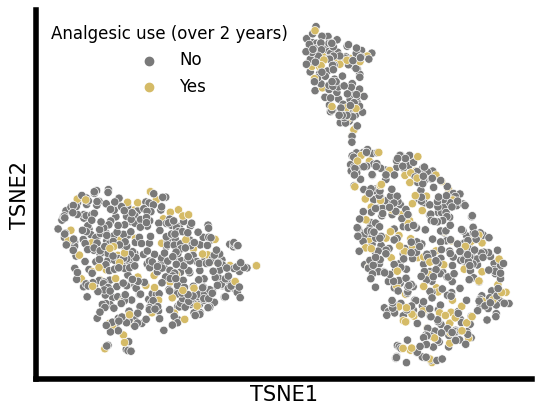

In [364]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="Analgesic >=2 years (overall)", palette={"No": colors[7], "Yes": colors[8]})
plting.tsne_plot_ax(ax=ax, legend_title="Analgesic use (over 2 years)", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_Analgesic >=2 years (overall).png", dpi=250, bbox_inches="tight")

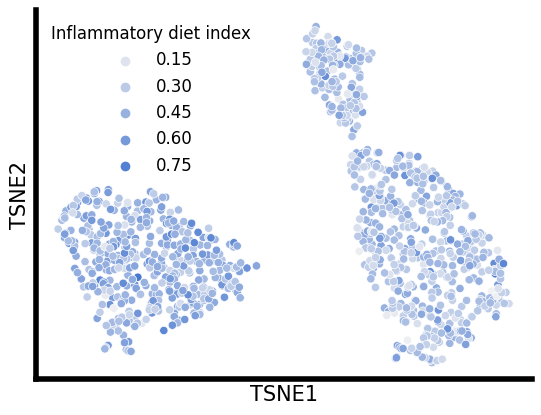

In [363]:
ax = sns.scatterplot(data=X_tsne,x="TSNE1",y="TSNE2",hue="inflammatory_n", palette=sns.light_palette(colors[0], as_cmap=True))
plting.tsne_plot_ax(ax=ax, legend_title="Inflammatory diet index", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "TSNE_EPIC_inflammatory_n.png", dpi=250, bbox_inches="tight")

# PCA data

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
X_pca = pca.fit_transform(full_EPIC_b)
X_pca = pd.DataFrame(X_pca, index=full_EPIC_b.index, columns=[f"PCA{i+1}" for i in range(X_pca.shape[1])])

X_pca = pd.concat([X_pca, full_EPIC_clin],axis=1)

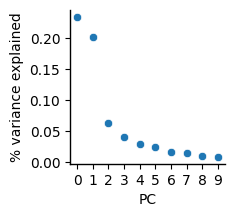

In [14]:
fig, ax = plt.subplots(1,1,figsize=(2,2))
sns.scatterplot(x=np.arange(10),y=pca.explained_variance_ratio_[:10])
plting.pretty_ax(ax)
ax.set_ylabel("% variance explained")
ax.set_xlabel("PC")
ax.set_xticks(np.arange(10))
fig.savefig(fig_dir / "PCA_variance_explained.png", dpi=200, bbox_inches="tight")

In [15]:
batch = np.concatenate([["SWEPIC1"]*EPIC2_clin.shape[0],["SWEPIC2"]*EPIC3_clin.shape[0],["SWEPIC3"]*EPIC4_clin.shape[0]])

X_pca["Batch"] = batch
X_pca["Adenoma"] = full_EPIC_phenotypes

In [16]:
clin_params = ["Age at visit","Gender","BMI","Ever smoked cigarettes",
               "Metabolic syndrome","Analgesic >=2 years (overall)",
               "Pack years","inflammatory_n","anti-inflammatory_n",
               "western_n","prudent_n","Adenoma"]
bin_params = ["Adenoma","Gender","Ever smoked cigarettes","Metabolic syndrome",
              "Analgesic >=2 years (overall)",]
cont_params = ["Age at visit","BMI","Pack years","inflammatory_n",
               "anti-inflammatory_n",
               "western_n","prudent_n"]

In [17]:
df = X_pca[[f"PCA{i+1}" for i in range(50)] + clin_params + ["Batch"]]

In [21]:
associations = {}
for pc in [f"PCA{i+1}" for i in range(50)]:
    associations[pc] = {}
    pval = kruskal(df[df.Batch=="SWEPIC1"][pc],df[df.Batch=="SWEPIC2"][pc],df[df.Batch=="SWEPIC3"][pc])[1]
    associations[pc]["Batch"] = pval
    for col in bin_params:
        neg = df[col]==0
        pos = df[col]==1
        pval = kruskal(df[neg][pc],df[pos][pc])[1]
        associations[pc][col] = pval
    for col in cont_params:
        dfred = df[[pc,col]].dropna()
        pval = pearsonr(dfred[pc],dfred[col])[1]
        associations[pc][col] = pval
associations = pd.DataFrame.from_dict(associations)
associations = associations.applymap(lambda x: -np.log10(x))

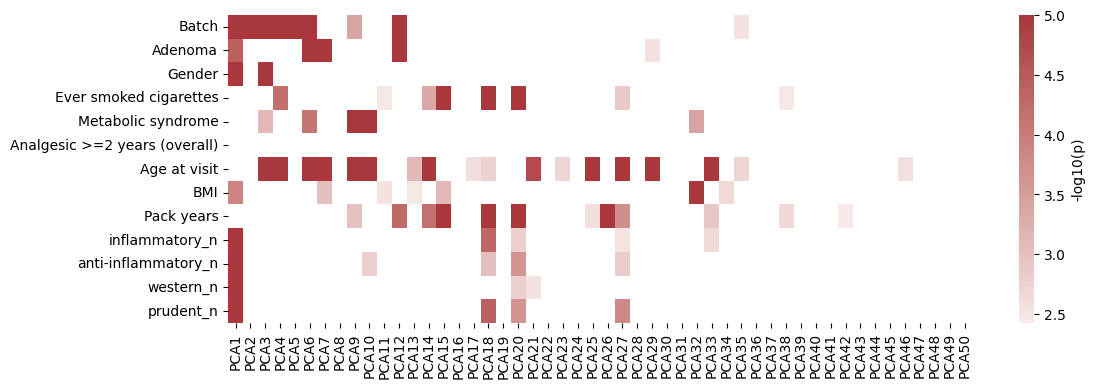

In [27]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
alpha_bonf = 0.05/associations.shape[0]
alpha_bonf = -np.log10(alpha_bonf)
sns.heatmap(associations, mask=associations<alpha_bonf, cmap="vlag", vmax=5,
            center=0.9*alpha_bonf, ax=ax, cbar_kws={"label": "-log10(p)"})
fig.savefig(fig_dir / "PCA_heatmap_clin_associations.png", dpi=250, bbox_inches="tight")

In [402]:
X_pca["Adenoma"] = full_EPIC_phenotypes
X_pca["Adenoma"] = X_pca["Adenoma"].replace({0: "No", 1: "Yes"})

X_pca["Gender"] = X_pca["Gender"].replace({1: "F", 0: "M"})

X_pca["Metabolic syndrome"] = X_pca["Metabolic syndrome"].replace({0: "No", 1: "Yes"})

X_pca["Analgesic >=2 years (overall)"] = X_pca["Analgesic >=2 years (overall)"].replace({0: "No", 1: "Yes"})

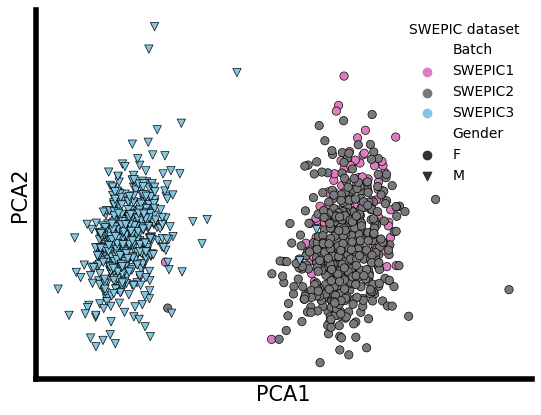

In [403]:
ax = sns.scatterplot(data=X_pca,x="PCA1",y="PCA2",hue="Batch", style="Gender", palette={"SWEPIC1": colors[6], 
                                                                           "SWEPIC2": colors[7], 
                                                                           "SWEPIC3": colors[9]}, 
                     markers={"F": "o", "M": "v"}, edgecolor="black")
plting.tsne_plot_ax(ax=ax, legend_title="SWEPIC dataset", leg_ftsize=10, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "pca_EPIC_batch.png", dpi=250, bbox_inches="tight")

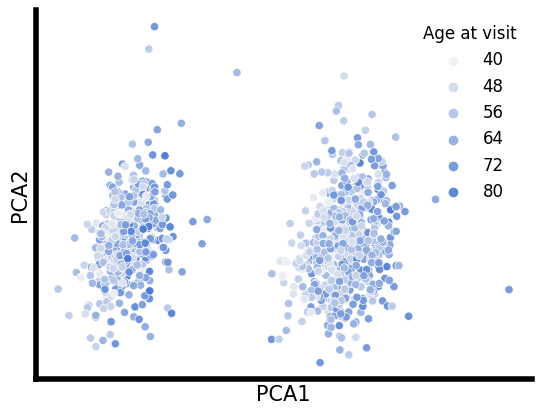

In [404]:
ax = sns.scatterplot(data=X_pca, x="PCA1",y="PCA2",hue="Age at visit", palette=sns.light_palette(colors[0], as_cmap=True))
plting.tsne_plot_ax(ax=ax, legend_title="Age at visit", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "pca_EPIC_age.png", dpi=250, bbox_inches="tight")

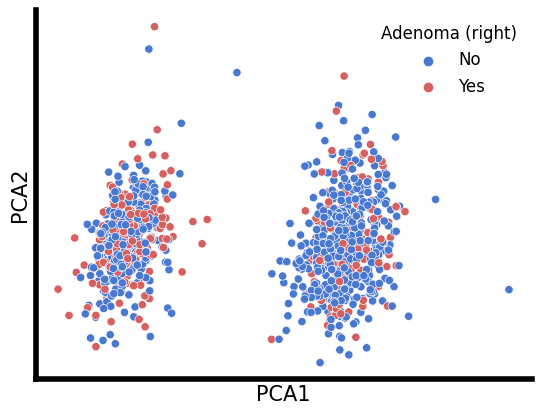

In [405]:
ax = sns.scatterplot(data=X_pca,x="PCA1",y="PCA2",hue="Adenoma", palette = {"Yes": colors[3], "No": colors[0]})
plting.tsne_plot_ax(ax=ax, legend_title="Adenoma (right)", leg_ftsize=12, ftsize=15, linew=4)
ax.figure.savefig(fig_dir / "pca_EPIC_adenoma.png", dpi=250, bbox_inches="tight")

# General values

In [98]:
(n2, ncpg2), (n3, ncpg3), (n4, ncpg4)= EPIC2_b.shape, EPIC3_b.shape, EPIC4_b.shape

In [163]:
(n2, ncpg2), (n3, ncpg3), (n4, ncpg4)

((140, 324053), (502, 324053), (469, 306651))

In [99]:
ad2, ad3, ad4 = np.sum(EPIC2_phenotypes.astype(int)), np.sum(EPIC3_phenotypes.astype(int)), np.sum(EPIC4_phenotypes.astype(int))

In [100]:
(ad2, ad2/n2*100), (ad3, ad3/n3*100), (ad4, ad4/n4*100)

((76, 54.285714285714285), (65, 12.94820717131474), (179, 38.16631130063966))

In [147]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="Age at visit", count=False)

Full
count    1111.000000
mean       60.774077
std         9.608193
min        40.000000
25%        53.000000
50%        60.000000
75%        68.000000
max        86.000000
Name: Age at visit, dtype: float64
Healthy
count    791.000000
mean      59.319848
std        9.408189
min       40.000000
25%       52.000000
50%       59.000000
75%       66.000000
max       85.000000
Name: Age at visit, dtype: float64
Adenoma pat
count    320.00000
mean      64.36875
std        9.15531
min       41.00000
25%       58.00000
50%       65.00000
75%       71.00000
max       86.00000
Name: Age at visit, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=88768.0, pvalue=5.855083754895978e-15)


In [148]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="BMI", count=False)

Full
count    1111.000000
mean       25.428044
std         6.108554
min         0.000000
25%        22.558504
50%        25.344353
75%        28.213142
max        52.392376
Name: BMI, dtype: float64
Healthy
count    791.000000
mean      25.127341
std        6.097387
min        0.000000
25%       22.318294
50%       25.013521
75%       27.961551
max       48.406180
Name: BMI, dtype: float64
Adenoma pat
count    320.000000
mean      26.171345
std        6.081981
min        0.000000
25%       23.381947
50%       26.077478
75%       28.968723
max       52.392376
Name: BMI, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=112319.5, pvalue=0.0032792089658187397)


In [220]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="Metabolic syndrome", count=True)

Full
271.0 0.24392439243924394
Healthy
167.0 0.2111251580278129
Adenoma pat
104.0 0.325
pval healthy vs adenoma
(1.7990685296074518, 0.00010811727862595054)


In [221]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="Ever smoked cigarettes", count=True)

Full
501.0 0.45094509450945097
Healthy
354.0 0.4475347661188369
Adenoma pat
147.0 0.459375
pval healthy vs adenoma
(1.048937004016851, 0.7394475801033525)


In [157]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="Pack years", count=False)

Full
count    1111.000000
mean        8.520173
std        15.105227
min         0.000000
25%         0.000000
50%         0.000000
75%        11.500000
max       111.000000
Name: Pack years, dtype: float64
Healthy
count    791.000000
mean       7.659814
std       13.501743
min        0.000000
25%        0.000000
50%        0.000000
75%       10.350000
max       98.000000
Name: Pack years, dtype: float64
Adenoma pat
count    320.000000
mean      10.646875
std       18.333282
min        0.000000
25%        0.000000
50%        0.000000
75%       16.625000
max      111.000000
Name: Pack years, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=121298.0, pvalue=0.23128871878670332)


In [222]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="Analgesic >=2 years (overall)", count=True)

Full
191.0 0.1719171917191719
Healthy
149.0 0.18836915297092288
Adenoma pat
42.0 0.13125
pval healthy vs adenoma
(0.6509584278885616, 0.02249696716525676)


In [159]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="western_n", count=False)

Full
count    994.000000
mean       0.239824
std        0.103975
min        0.005641
25%        0.163066
50%        0.231522
75%        0.310478
max        0.567296
Name: western_n, dtype: float64
Healthy
count    712.000000
mean       0.237470
std        0.105307
min        0.005641
25%        0.161527
50%        0.229387
75%        0.306640
max        0.567296
Name: western_n, dtype: float64
Adenoma pat
count    282.000000
mean       0.245767
std        0.100471
min        0.020197
25%        0.176605
50%        0.236257
75%        0.319579
max        0.508206
Name: western_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=95221.0, pvalue=0.2050817922893864)


In [160]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="prudent_n", count=False)

Full
count    994.000000
mean       0.255113
std        0.104561
min        0.004897
25%        0.179960
50%        0.245420
75%        0.321115
max        0.638762
Name: prudent_n, dtype: float64
Healthy
count    712.000000
mean       0.263364
std        0.106680
min        0.004897
25%        0.188145
50%        0.253354
75%        0.330554
max        0.638762
Name: prudent_n, dtype: float64
Adenoma pat
count    282.000000
mean       0.234282
std        0.096080
min        0.023241
25%        0.163688
50%        0.230097
75%        0.290990
max        0.596720
Name: prudent_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=116219.0, pvalue=0.00010496520333948721)


In [161]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="inflammatory_n", count=False)

Full
count    994.000000
mean       0.393045
std        0.127923
min        0.067048
25%        0.306557
50%        0.393523
75%        0.480626
max        0.800151
Name: inflammatory_n, dtype: float64
Healthy
count    712.000000
mean       0.385880
std        0.130073
min        0.067048
25%        0.298987
50%        0.379577
75%        0.473434
max        0.786170
Name: inflammatory_n, dtype: float64
Adenoma pat
count    282.000000
mean       0.411135
std        0.120666
min        0.105814
25%        0.331105
50%        0.411832
75%        0.498191
max        0.800151
Name: inflammatory_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=88242.0, pvalue=0.002904720944313393)


In [162]:
print_characteristic(EPIC_clin=full_EPIC_clin, EPIC_phenotypes=full_EPIC_phenotypes, charac="anti-inflammatory_n", count=False)

Full
count    994.000000
mean       0.249287
std        0.097337
min        0.008413
25%        0.182674
50%        0.240964
75%        0.308856
max        0.624137
Name: anti-inflammatory_n, dtype: float64
Healthy
count    712.000000
mean       0.257158
std        0.100098
min        0.008413
25%        0.187197
50%        0.246327
75%        0.315776
max        0.624137
Name: anti-inflammatory_n, dtype: float64
Adenoma pat
count    282.000000
mean       0.229416
std        0.087037
min        0.025460
25%        0.169603
50%        0.219077
75%        0.281264
max        0.605226
Name: anti-inflammatory_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=116325.0, pvalue=9.430451964926907e-05)


# EPIC dataset-specific values

In [208]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="Age at visit", count=False)

Full
count    469.000000
mean      61.479744
std        9.718150
min       40.000000
25%       53.000000
50%       62.000000
75%       69.000000
max       85.000000
Name: Age at visit, dtype: float64
Healthy
count    290.000000
mean      59.727586
std        9.823262
min       40.000000
25%       51.000000
50%       59.000000
75%       67.000000
max       85.000000
Name: Age at visit, dtype: float64
Adenoma pat
count    179.000000
mean      64.318436
std        8.861877
min       42.000000
25%       58.000000
50%       65.000000
75%       71.000000
max       85.000000
Name: Age at visit, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=18956.0, pvalue=9.053035539289282e-07)


In [211]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="BMI", count=False)

Full
count    469.000000
mean      26.342831
std        5.012592
min        0.000000
25%       24.074074
50%       26.297577
75%       28.634039
max       52.392376
Name: BMI, dtype: float64
Healthy
count    290.000000
mean      26.105558
std        5.271539
min        0.000000
25%       24.074074
50%       26.122450
75%       28.302749
max       43.209877
Name: BMI, dtype: float64
Adenoma pat
count    179.000000
mean      26.727239
std        4.550079
min        0.000000
25%       24.104303
50%       26.555965
75%       29.045744
max       52.392376
Name: BMI, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=24592.0, pvalue=0.3392974769542223)


In [225]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="Metabolic syndrome", count=True)

Full
129.0 0.27505330490405117
Healthy
67.0 0.23103448275862068
Adenoma pat
62.0 0.3463687150837989
pval healthy vs adenoma
(1.7637453756856742, 0.007771664036829068)


In [228]:
print_characteristic(EPIC_clin=EPIC3_clin, EPIC_phenotypes=EPIC3_phenotypes, charac="Ever smoked cigarettes", count=True)

Full
241.0 0.4800796812749004
Healthy
208.0 0.4759725400457666
Adenoma pat
33.0 0.5076923076923077
pval healthy vs adenoma
(1.1353665865384615, 0.6904176717490353)


In [232]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="Pack years", count=False)

Full
count    469.000000
mean       9.790378
std       17.189977
min        0.000000
25%        0.000000
50%        0.000000
75%       14.500000
max      111.000000
Name: Pack years, dtype: float64
Healthy
count    290.000000
mean       8.357198
std       14.882385
min        0.000000
25%        0.000000
50%        0.000000
75%       12.000000
max       98.000000
Name: Pack years, dtype: float64
Adenoma pat
count    179.000000
mean      12.112291
std       20.212610
min        0.000000
25%        0.000000
50%        0.000000
75%       20.000000
max      111.000000
Name: Pack years, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=24903.0, pvalue=0.41414557696437526)


In [237]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="Analgesic >=2 years (overall)", count=True)

Full
68.0 0.14498933901918976
Healthy
45.0 0.15517241379310345
Adenoma pat
23.0 0.12849162011173185
pval healthy vs adenoma
(0.8027065527065527, 0.5001043005223633)


In [241]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="western_n", count=False)

Full
count    410.000000
mean       0.268959
std        0.104813
min        0.020197
25%        0.196049
50%        0.264911
75%        0.347253
max        0.567296
Name: western_n, dtype: float64
Healthy
count    258.000000
mean       0.269257
std        0.106781
min        0.020843
25%        0.197092
50%        0.262617
75%        0.345369
max        0.567296
Name: western_n, dtype: float64
Adenoma pat
count    152.000000
mean       0.268453
std        0.101732
min        0.020197
25%        0.194262
50%        0.269281
75%        0.347986
max        0.508206
Name: western_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=19486.0, pvalue=0.916505196347426)


In [244]:
print_characteristic(EPIC_clin=EPIC2_clin, EPIC_phenotypes=EPIC2_phenotypes, charac="prudent_n", count=False)

Full
count    130.000000
mean       0.273390
std        0.102213
min        0.066494
25%        0.206269
50%        0.256884
75%        0.339004
max        0.596720
Name: prudent_n, dtype: float64
Healthy
count    62.000000
mean      0.279856
std       0.106146
min       0.066494
25%       0.215286
50%       0.262351
75%       0.349318
max       0.592646
Name: prudent_n, dtype: float64
Adenoma pat
count    68.000000
mean      0.267494
std       0.098911
min       0.097535
25%       0.204057
50%       0.251466
75%       0.330277
max       0.596720
Name: prudent_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=2295.0, pvalue=0.3846679246888912)


In [247]:
print_characteristic(EPIC_clin=EPIC3_clin, EPIC_phenotypes=EPIC3_phenotypes, charac="inflammatory_n", count=False)

Full
count    454.000000
mean       0.360701
std        0.121599
min        0.067048
25%        0.271600
50%        0.353734
75%        0.437507
max        0.786170
Name: inflammatory_n, dtype: float64
Healthy
count    392.000000
mean       0.358627
std        0.124067
min        0.067048
25%        0.269943
50%        0.349193
75%        0.439212
max        0.786170
Name: inflammatory_n, dtype: float64
Adenoma pat
count    62.000000
mean      0.373813
std       0.104591
min       0.149070
25%       0.317339
50%       0.390196
75%       0.431096
max       0.643331
Name: inflammatory_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=10976.0, pvalue=0.22075315306532595)


In [250]:
print_characteristic(EPIC_clin=EPIC4_clin, EPIC_phenotypes=EPIC4_phenotypes, charac="anti-inflammatory_n", count=False)

Full
count    410.000000
mean       0.219406
std        0.087883
min        0.008413
25%        0.157227
50%        0.208708
75%        0.275052
max        0.624137
Name: anti-inflammatory_n, dtype: float64
Healthy
count    258.000000
mean       0.228888
std        0.092269
min        0.008413
25%        0.166872
50%        0.221948
75%        0.290056
max        0.624137
Name: anti-inflammatory_n, dtype: float64
Adenoma pat
count    152.000000
mean       0.203312
std        0.077559
min        0.025460
25%        0.145651
50%        0.192298
75%        0.256467
max        0.465605
Name: anti-inflammatory_n, dtype: float64
pval healthy vs adenoma
MannwhitneyuResult(statistic=22689.0, pvalue=0.007859975264973295)
